In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'fireBall',
    'thunderStorm',
    'ignition',
    'magicCasting',
    'UICall'
]

data = np.concatenate([
    np.load('dataset/seq_fireBall_1630653460.npy'),
    np.load('dataset/seq_thunderStorm_1630653460.npy'),
    np.load('dataset/seq_ignition_1630653460.npy'),
    np.load('dataset/seq_magicCasting_1630653460.npy'),
    np.load('dataset/seq_UICall_1630653460.npy')
], axis=0)

data.shape

(5600, 30, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(5600, 30, 99)
(5600,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(5600, 5)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(5040, 30, 99) (5040, 5)
(560, 30, 99) (560, 5)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                41984     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 44,229
Trainable params: 44,229
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
158/158 [==============================] - 2s 8ms/step - loss: 39.1808 - acc: 0.2710 - val_loss: 23.0549 - val_acc: 0.2732

Epoch 00001: val_acc improved from -inf to 0.27321, saving model to models\model.h5
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 11.2636 - acc: 0.3732 - val_loss: 7.1073 - val_acc: 0.4268

Epoch 00002: val_acc improved from 0.27321 to 0.42679, saving model to models\model.h5
Epoch 3/200
158/158 [==============================] - 1s 7ms/step - loss: 6.4804 - acc: 0.4550 - val_loss: 4.7557 - val_acc: 0.5304

Epoch 00003: val_acc improved from 0.42679 to 0.53036, saving model to models\model.h5
Epoch 4/200
158/158 [==============================] - 1s 7ms/step - loss: 5.2683 - acc: 0.5113 - val_loss: 5.9074 - val_acc: 0.5018

Epoch 00004: val_acc did not improve from 0.53036
Epoch 5/200
158/158 [==============================] - 1s 8ms/step - loss: 5.2647 - acc: 0.5143 - val_loss: 5.5410 - val_acc: 0.4911

Epoch 00005: val_ac

158/158 [==============================] - 1s 7ms/step - loss: 0.1924 - acc: 0.9284 - val_loss: 0.2187 - val_acc: 0.9107

Epoch 00041: val_acc did not improve from 0.92143
Epoch 42/200
158/158 [==============================] - 1s 7ms/step - loss: 0.1820 - acc: 0.9333 - val_loss: 0.2124 - val_acc: 0.9214

Epoch 00042: val_acc did not improve from 0.92143
Epoch 43/200
158/158 [==============================] - 1s 8ms/step - loss: 0.1730 - acc: 0.9365 - val_loss: 0.2011 - val_acc: 0.9232

Epoch 00043: val_acc improved from 0.92143 to 0.92321, saving model to models\model.h5
Epoch 44/200
158/158 [==============================] - 1s 7ms/step - loss: 0.1601 - acc: 0.9401 - val_loss: 0.1863 - val_acc: 0.9214

Epoch 00044: val_acc did not improve from 0.92321
Epoch 45/200
158/158 [==============================] - 1s 7ms/step - loss: 0.1724 - acc: 0.9387 - val_loss: 0.1945 - val_acc: 0.9232

Epoch 00045: val_acc did not improve from 0.92321
Epoch 46/200
158/158 [=============================

158/158 [==============================] - 1s 7ms/step - loss: 0.0441 - acc: 0.9863 - val_loss: 0.0335 - val_acc: 0.9893

Epoch 00083: val_acc did not improve from 0.99107
Epoch 84/200
158/158 [==============================] - 1s 7ms/step - loss: 0.0187 - acc: 0.9938 - val_loss: 0.0282 - val_acc: 0.9929

Epoch 00084: val_acc improved from 0.99107 to 0.99286, saving model to models\model.h5
Epoch 85/200
158/158 [==============================] - 1s 7ms/step - loss: 0.0161 - acc: 0.9944 - val_loss: 0.0512 - val_acc: 0.9839

Epoch 00085: val_acc did not improve from 0.99286
Epoch 86/200
158/158 [==============================] - 1s 7ms/step - loss: 0.0469 - acc: 0.9839 - val_loss: 0.0265 - val_acc: 0.9857

Epoch 00086: val_acc did not improve from 0.99286
Epoch 87/200
158/158 [==============================] - 1s 8ms/step - loss: 0.0145 - acc: 0.9964 - val_loss: 0.0218 - val_acc: 0.9911

Epoch 00087: val_acc did not improve from 0.99286
Epoch 88/200
158/158 [=============================


Epoch 00126: val_acc did not improve from 0.99643
Epoch 127/200
158/158 [==============================] - 1s 7ms/step - loss: 0.6194 - acc: 0.7560 - val_loss: 0.6691 - val_acc: 0.7446

Epoch 00127: val_acc did not improve from 0.99643
Epoch 128/200
158/158 [==============================] - 1s 7ms/step - loss: 0.6132 - acc: 0.7706 - val_loss: 0.6656 - val_acc: 0.7071

Epoch 00128: val_acc did not improve from 0.99643
Epoch 129/200
158/158 [==============================] - 1s 7ms/step - loss: 0.5680 - acc: 0.7901 - val_loss: 0.5802 - val_acc: 0.7679

Epoch 00129: val_acc did not improve from 0.99643
Epoch 130/200
158/158 [==============================] - 1s 7ms/step - loss: 0.5480 - acc: 0.7940 - val_loss: 0.5533 - val_acc: 0.7857

Epoch 00130: val_acc did not improve from 0.99643
Epoch 131/200
158/158 [==============================] - 1s 8ms/step - loss: 0.5116 - acc: 0.8069 - val_loss: 0.4868 - val_acc: 0.7982

Epoch 00131: val_acc did not improve from 0.99643
Epoch 132/200
158/1

158/158 [==============================] - 1s 7ms/step - loss: 0.3642 - acc: 0.8784 - val_loss: 0.3959 - val_acc: 0.8554

Epoch 00170: val_acc did not improve from 0.99643
Epoch 171/200
158/158 [==============================] - 1s 7ms/step - loss: 0.3213 - acc: 0.8911 - val_loss: 0.3403 - val_acc: 0.8768

Epoch 00171: val_acc did not improve from 0.99643
Epoch 172/200
158/158 [==============================] - 1s 7ms/step - loss: 0.2932 - acc: 0.8952 - val_loss: 0.3190 - val_acc: 0.8839

Epoch 00172: val_acc did not improve from 0.99643
Epoch 173/200
158/158 [==============================] - 1s 7ms/step - loss: 0.2997 - acc: 0.8931 - val_loss: 0.2705 - val_acc: 0.9107

Epoch 00173: val_acc did not improve from 0.99643
Epoch 174/200
158/158 [==============================] - 1s 7ms/step - loss: 0.3144 - acc: 0.8855 - val_loss: 0.4041 - val_acc: 0.8339

Epoch 00174: val_acc did not improve from 0.99643
Epoch 175/200
158/158 [==============================] - 1s 7ms/step - loss: 0.3627 

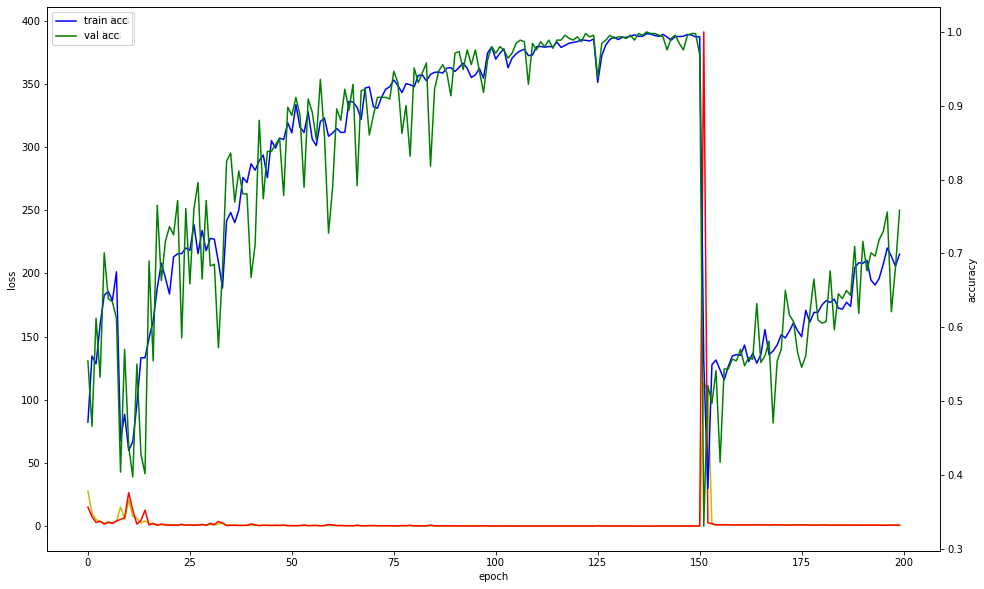

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[286,   0],
        [  0, 165]],

       [[300,   0],
        [  0, 151]],

       [[316,   0],
        [  0, 135]]], dtype=int64)